# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [115]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [116]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [117]:
#  1. Get the total rides for each city 
totalridesbytype=pyber_data_df.groupby(["type"]).count()["ride_id"]
totalridesbytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [118]:
# 2. Get the total drivers for each city type
totaldriversbycitytype=city_data_df.groupby(["type"]).sum()["driver_count"]
totaldriversbycitytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [119]:
#  3. Get the total amount of fares for each city type
totalamountfaresbycitytype=pyber_data_df.groupby(["type"]).sum()["fare"]
totalamountfaresbycitytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [120]:
#  4. Get the averag fare per ride for each city type. 
averagefarebycitytype=totalamountfaresbycitytype/totalridesbytype
averagefarebycitytype

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [121]:
# 5. Get the average fare per driver for each city type. 
averagefarebydriverforcitytype=totalamountfaresbycitytype/totaldriversbycitytype
averagefarebydriverforcitytype

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [122]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({'total_rides':totalridesbytype,'total_drivers':totaldriversbycitytype,'total_fares':totalamountfaresbycitytype,'Average_Fare_Per_Ride':averagefarebycitytype,'Average_Fare_Per_Driver':averagefarebydriverforcitytype})
pyber_summary_df

,total_rides,total_drivers,total_fares,Average_Fare_Per_Ride,Average_Fare_Per_Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [123]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [124]:
#  8. Format the columns.
pyber_summary_df['total_fares']=pyber_summary_df['total_fares'].map('${:,.2f}'.format)
pyber_summary_df['Average_Fare_Per_Ride']=pyber_summary_df['Average_Fare_Per_Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average_Fare_Per_Driver']=pyber_summary_df['Average_Fare_Per_Driver'].map('${:,.2f}'.format)
pyber_summary_df

,total_rides,total_drivers,total_fares,Average_Fare_Per_Ride,Average_Fare_Per_Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [125]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [126]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df=pyber_data_df.groupby(["type","date"])["fare"].sum()
df=pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

In [127]:
df=df.reset_index()

In [128]:
df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [129]:
pivot_df=pd.pivot(df,values="fare",index=["date"],columns=["type"])

In [130]:
pivot_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [131]:
pivot_df.index=pd.to_datetime(pivot_df.index)
pivot_df.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-05-07 05:55:00', '2019-05-07 07:08:00',
               '2019-05-07 08:47:00', '2019-05-08 11:38:00',
               '2019-05-08 13:10:00', '2019-05-08 01:54:00',
               '2019-05-08 02:31:00', '2019-05-08 04:20:00',
               '2019-05-08 04:39:00', '2019-05-08 07:29:00'],
              dtype='datetime64[ns]', name='date', length=2361, freq=None)

In [137]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pivot_df=pivot_df.loc['2019-01-01':'2019-04-29']
pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [138]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_df.index = pd.to_datetime(pivot_df.index)

In [139]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [141]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_df=pivot_df.resample("W").sum()

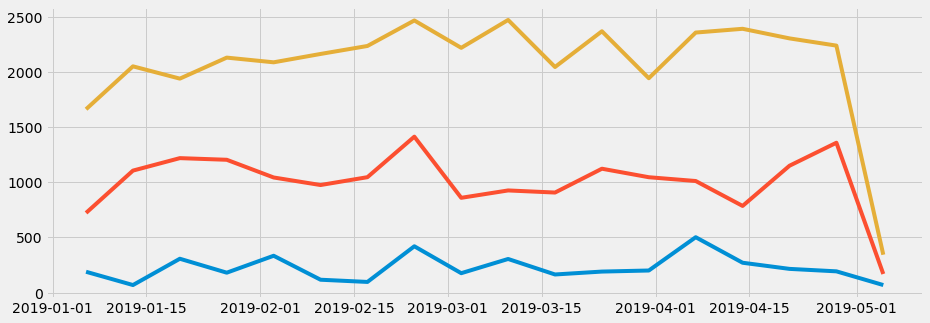

In [146]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig=plt.figure(figsize=[14,5])
plt.plot(pivot_df)


In [147]:
import os

In [148]:
os.getcwd()

'C:\\Users\\lrosa\\PyBer_Analysis'